In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
%matplotlib inline 

In [2]:
# 导入数据
(X_train_all,Y_train_all),(X_test,Y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [3]:
print(X_train_all.shape)
print(Y_train_all.shape)

(60000, 28, 28)
(60000,)


In [4]:
print(X_test.shape)
print(Y_test.shape)

(10000, 28, 28)
(10000,)


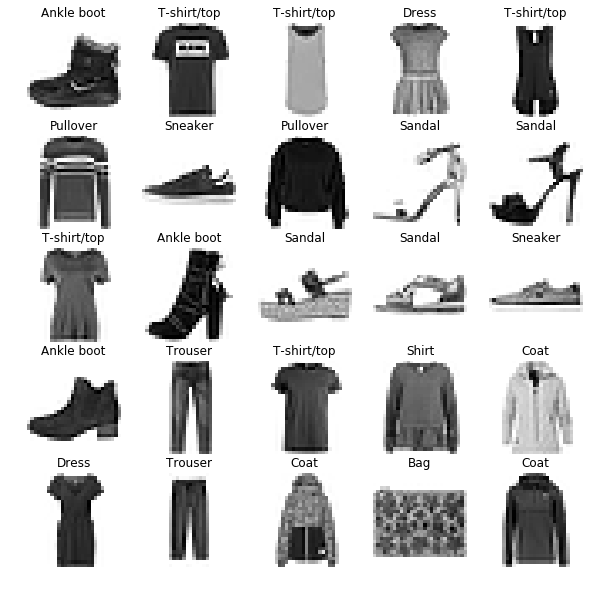

In [5]:
# show image
def show_image(rows,columns,x_data,y_data):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    plt.figure(figsize=(2*rows,2*columns))
    for i in range(rows):
        for j in range(columns):
            index=columns*i+j
            plt.subplot(rows,columns,index+1)
            plt.imshow(x_data[index],cmap="binary",interpolation="nearest")
            plt.axis("off")
            plt.title(class_names[y_data[index]])
    plt.show()
show_image(5,5,X_train_all,Y_train_all)

In [6]:
#train valid split
from sklearn.model_selection import train_test_split
X_train,X_valid,Y_train,Y_valid=train_test_split(X_train_all,Y_train_all)

In [7]:
# normalized
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train_scaled=scale.fit_transform(X_train.astype(np.float64).reshape(-1,1)).reshape(-1,28,28)
X_test_scaled=scale.transform(X_test.astype(np.float64).reshape(-1,1)).reshape(-1,28,28)
X_valid_scaled=scale.transform(X_valid.astype(np.float64).reshape(-1,1)).reshape(-1,28,28)

Y_train=Y_train.astype(np.float64)
Y_test=Y_test.astype(np.float64)
Y_valid=Y_valid.astype(np.float64)

In [8]:
#shape 检查
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(X_valid_scaled.shape)

print(Y_train.shape)
print(Y_test.shape)
print(Y_valid.shape)


(45000, 28, 28)
(10000, 28, 28)
(15000, 28, 28)
(45000,)
(10000,)
(15000,)


In [9]:
# 类型检查
print(X_train_scaled.dtype)
print(X_test_scaled.dtype)
print(X_valid_scaled.dtype)
print(Y_train.dtype)
print(Y_test.dtype)
print(Y_valid.dtype)

float64
float64
float64
float64
float64
float64


In [10]:
print(X_train_scaled.max())
print(X_train_scaled.min())

2.021795683037892
-0.8107501408513736


In [11]:
# 构建模型

In [12]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])


In [15]:
log_path="./callbacks_dir"
import os
import sys
print(os.path.abspath(log_path))
if not os.path.exists(log_path):
    os.makedirs(log_path)
model_file=os.path.join(log_path,"tf_model.h5")

C:\Users\hongwei\Desktop\tf_learn\callbacks_dir


In [29]:
callbacks=[
#     tf.keras.callbacks.TensorBoard(log_path),
#     tf.keras.callbacks.ModelCheckpoint(filepath=model_file,save_best_only=True),      
#     tf.keras.callbacks.EarlyStopping(patience=8,min_delta=1e-3)
]

In [ ]:
history=model.fit(X_train_scaled,Y_train,epochs=30,validation_data=(X_valid_scaled,Y_valid),callbacks=callbacks)

Train on 45000 samples, validate on 15000 samples
Epoch 1/30
45000/45000 [==============================] - 39s 868us/sample - loss: 0.2630 - accuracy: 0.9034 - val_loss: 0.3245 - val_accuracy: 0.8808
Epoch 2/30
45000/45000 [==============================] - 57s 1ms/sample - loss: 0.2515 - accuracy: 0.9088 - val_loss: 0.3575 - val_accuracy: 0.8702
Epoch 3/30
45000/45000 [==============================] - 69s 2ms/sample - loss: 0.2425 - accuracy: 0.9117 - val_loss: 0.3083 - val_accuracy: 0.8876
Epoch 4/30
45000/45000 [==============================] - 84s 2ms/sample - loss: 0.2341 - accuracy: 0.9134 - val_loss: 0.3340 - val_accuracy: 0.8768
Epoch 5/30
45000/45000 [==============================] - 101s 2ms/sample - loss: 0.2247 - accuracy: 0.9183 - val_loss: 0.3109 - val_accuracy: 0.8865
Epoch 6/30
45000/45000 [==============================] - 123s 3ms/sample - loss: 0.2168 - accuracy: 0.9206 - val_loss: 0.3196 - val_accuracy: 0.8825
Epoch 7/30
16288/45000 [=========>..................

In [ ]:
def plot_learning_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0.25,0.36)
    plt.show()

plot_learning_curve(history)

In [ ]:
model.evaluate(X_test_scaled,Y_test,verbose=0)